In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, zoomed_inset_axes

In [2]:
def range_decimal(start, stop, step, stop_inclusive=False):
    """ The Python range() function, using decimals.  A decimal loop_value generator.

    Note: The decimal math (addition) defines the rounding.

    If the stop is None, then:
        stop = start
        start = 0 (zero)

    If the step is 0 (zero) or None, then:
        if (stop < start) then step = -1 (minus one)
        if (stop >= start) then step = 1 (one)

    Example:
        for index in range_decimal(0, 1.0, '.1', stop_inclusive=True):
            print(index)

    :param start: The loop start value
    :param stop: The loop stop value
    :param step: The loop step value
    :param stop_inclusive: Include the stop value in the loop's yield generator: False = excluded ; True = included
    :return: The loop generator's yield increment value (decimal)
    """
    try:
        # Input argument(s) error check
        zero = decimal.Decimal('0')

        if start is None:
            start = zero

        if not isinstance(start, decimal.Decimal):
            start = decimal.Decimal(f'{start}')

        if stop is None:
            stop = start
            start = zero

        if not isinstance(stop, decimal.Decimal):
            stop = decimal.Decimal(f'{stop}')

        if step is None:
            step = decimal.Decimal('-1' if stop < start else '1')

        if not isinstance(step, decimal.Decimal):
            step = decimal.Decimal(f'{step}')

        if step == zero:
            step = decimal.Decimal('-1' if stop < start else '1')

        # Check for valid loop conditions
        if start == stop or (start < stop
                             and step < zero) or (start > stop
                                                  and step > zero):
            return  # Not valid: no loop

        # Case: increment step ( > 0 )
        if step > zero:
            while start < stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Case: decrement step ( < 0 )
        else:
            while start > stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Yield the stop value (inclusive)
        if stop_inclusive:
            yield stop

    except (ValueError, decimal.DecimalException) as ex:
        raise ValueError(f'{__name__}.range_decimal() error: {ex}')

In [6]:
source_dir = "../../outputs/gaussian/"

In [7]:
sigma_list = np.linspace(0.1,10,100)
tlist = np.linspace(-4, 4, 8000)

In [8]:
in_one_photon = np.loadtxt(source_dir+"population/input_one_photon_1.dat")
excited_atom = np.loadtxt(source_dir+"population/excited_atom_1.dat")
gs_atom = np.loadtxt(source_dir+"population/gs_atom_1.dat")

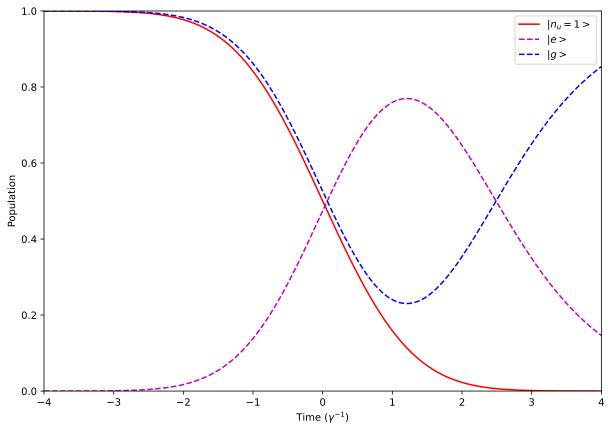

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}=1>$')
ax.plot(tlist, excited_atom, '--m', label='$|e>$')
ax.plot(tlist, gs_atom, '--b', label='$|g>$')
ax.set_xlim(-4,4)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()

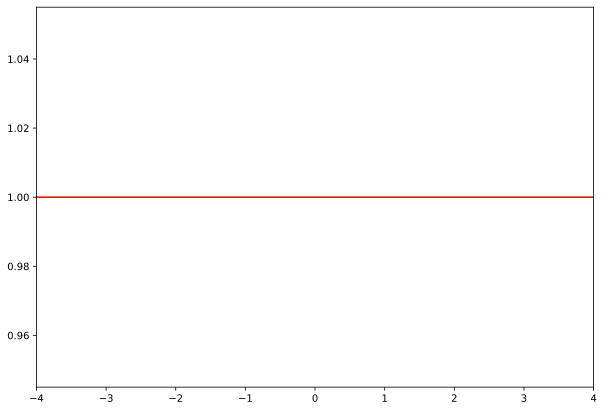

In [10]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, excited_atom+gs_atom, '-r')
ax.set_xlim(-4,4)
#ax.set_ylim(0,1)


plt.show()

In [11]:
gas_pur = np.loadtxt(source_dir + "fixed_sigma/sigma_1.0/gaussian_purity_1.0.dat")
gas_erg = np.loadtxt(source_dir + "fixed_sigma/sigma_1.0/gaussian_ergotropy_1.0.dat")
gas_ene = np.loadtxt(source_dir + "fixed_sigma/sigma_1.0/gaussian_energy_1.0.dat")

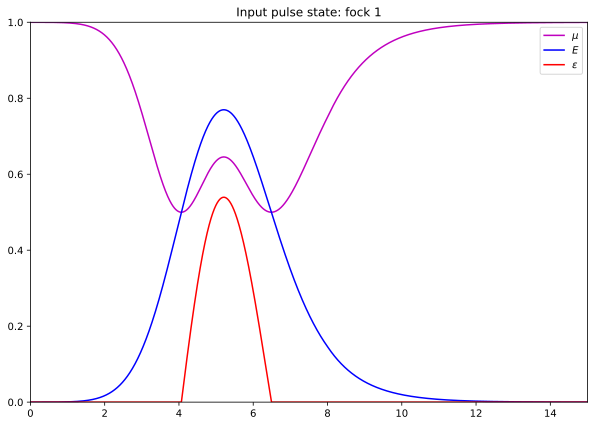

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(gas_pur[:,0], gas_pur[:,1], '-m', label='$\mu$')
ax.plot(gas_ene[:,0], gas_ene[:,1], '-b', label='$E$')
ax.plot(gas_erg[:,0], gas_erg[:,1], '-r', label='$\epsilon$')

ax.set_xlim(0,15)
ax.set_ylim(0,1)

ax.set_title("Input pulse state: fock 1")

ax.legend()

plt.show()

In [13]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

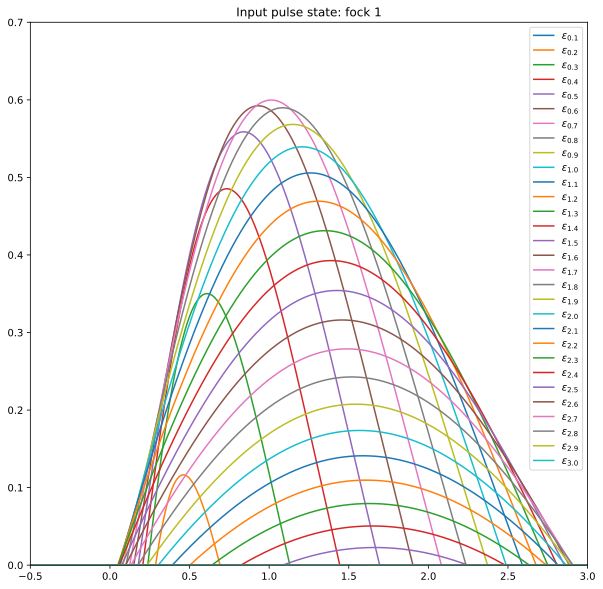

In [14]:
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(0.1,3.0,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_1/precision_0.001/sigma_"+str(sigma)+
                "/ergotropy_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0,0.7)
    axes.set_xlim(-0.5,3)
    axes.set_title("Input pulse state: fock 1")
    axes.legend()

#plt.tight_layout()
plt.show()

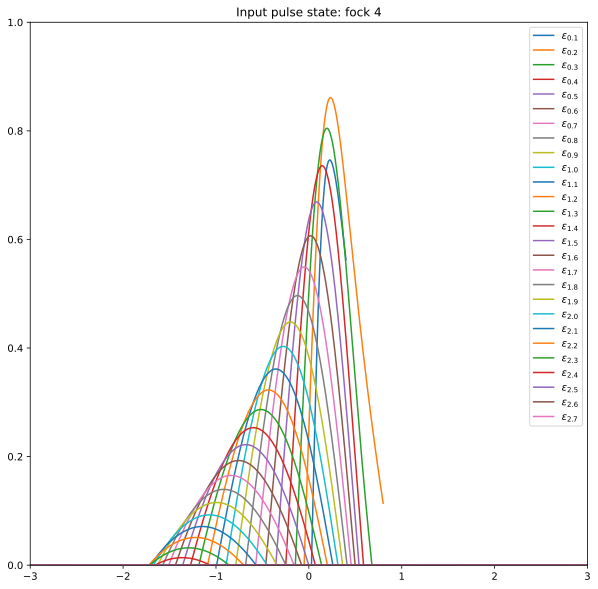

In [15]:
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_4/precision_0.001/sigma_"+str(sigma)+
                "/ergotropy_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0,1)
    axes.set_xlim(-3,3)
    axes.set_title("Input pulse state: fock 4")
    axes.legend()

#plt.tight_layout()
plt.show()

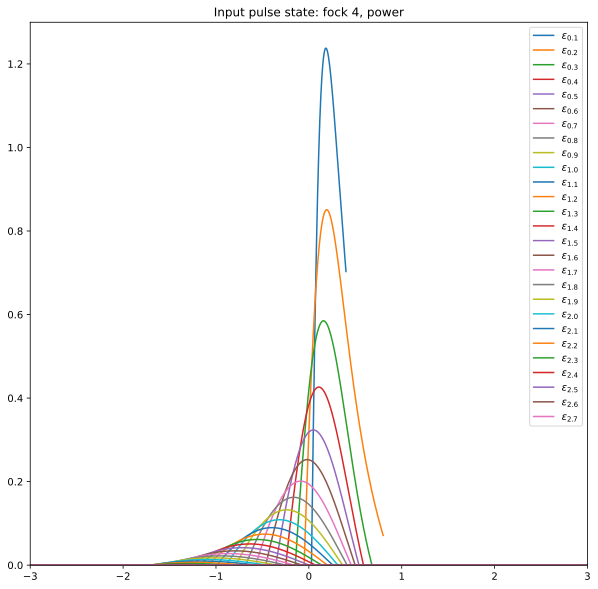

In [16]:
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_4/precision_0.001/sigma_"+str(sigma)+
                "/power_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0)
    axes.set_xlim(-3,3)
    axes.set_title("Input pulse state: fock 4, power")
    axes.legend()

#plt.tight_layout()
plt.show()

In [17]:
source_dir = "../../outputs/gaussian/max/"

In [21]:
max_erg_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.001/ergotropy*.dat")))) for i in range(1,11)]
max_ene_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.001/energy*.dat")))) for i in range(1,11)]
max_pow_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.001/power*.dat")))) for i in range(1,11)]

In [19]:
def plot_max(x, max_erg, max_ene, max_pow, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, max_erg, '-r', label='$\epsilon_{max}$')
    ax.plot(x, max_ene, '-b', label='$E_{max}$')
    ax.plot(x, max_pow, '-m', label='$P_{max}$')
    
    ax.set_xlim(x[0],x[-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Input pulse state: ' + title)
    ax.legend()
    
    return ax

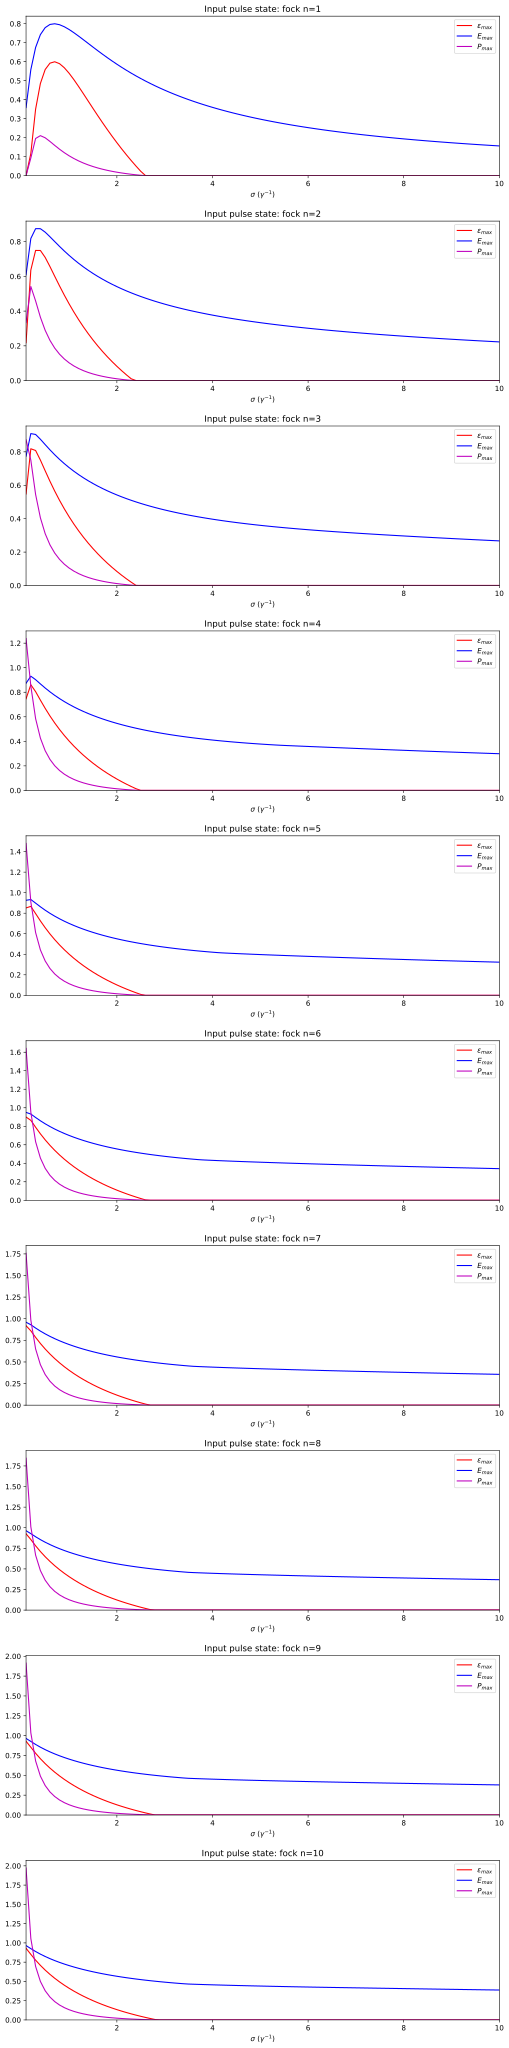

In [22]:
fig, axes = plt.subplots(len(max_erg_fock),figsize=(10, 40))
#fig.set_figheight(7)
#fig.set_figwidth(10)

for i in range( len(max_erg_fock) ):
    plot_max(sigma_list, max_erg_fock[i], max_ene_fock[i], max_pow_fock[i], title='fock n='+str(i+1), ax=axes[i])

plt.tight_layout()
plt.show()

In [23]:
max_erg_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.0005/ergotropy*.dat")))) for i in range(3,11)]
max_ene_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.0005/energy*.dat")))) for i in range(3,11)]
max_pow_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.0005/power*.dat")))) for i in range(3,11)]

In [24]:
def plot_max(max_erg, max_ene, max_pow, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(max_erg[:,0], max_erg[:,1], '-r', label='$\epsilon_{max}$')
    ax.plot(max_ene[:,0], max_ene[:,1], '-b', label='$E_{max}$')
    ax.plot(max_pow[:,0], max_pow[:,1], '-m', label='$P_{max}$')
    
    ax.set_xlim(max_erg[:,0][0],max_erg[:,0][-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Input pulse state: ' + title)
    ax.legend()
    
    return ax

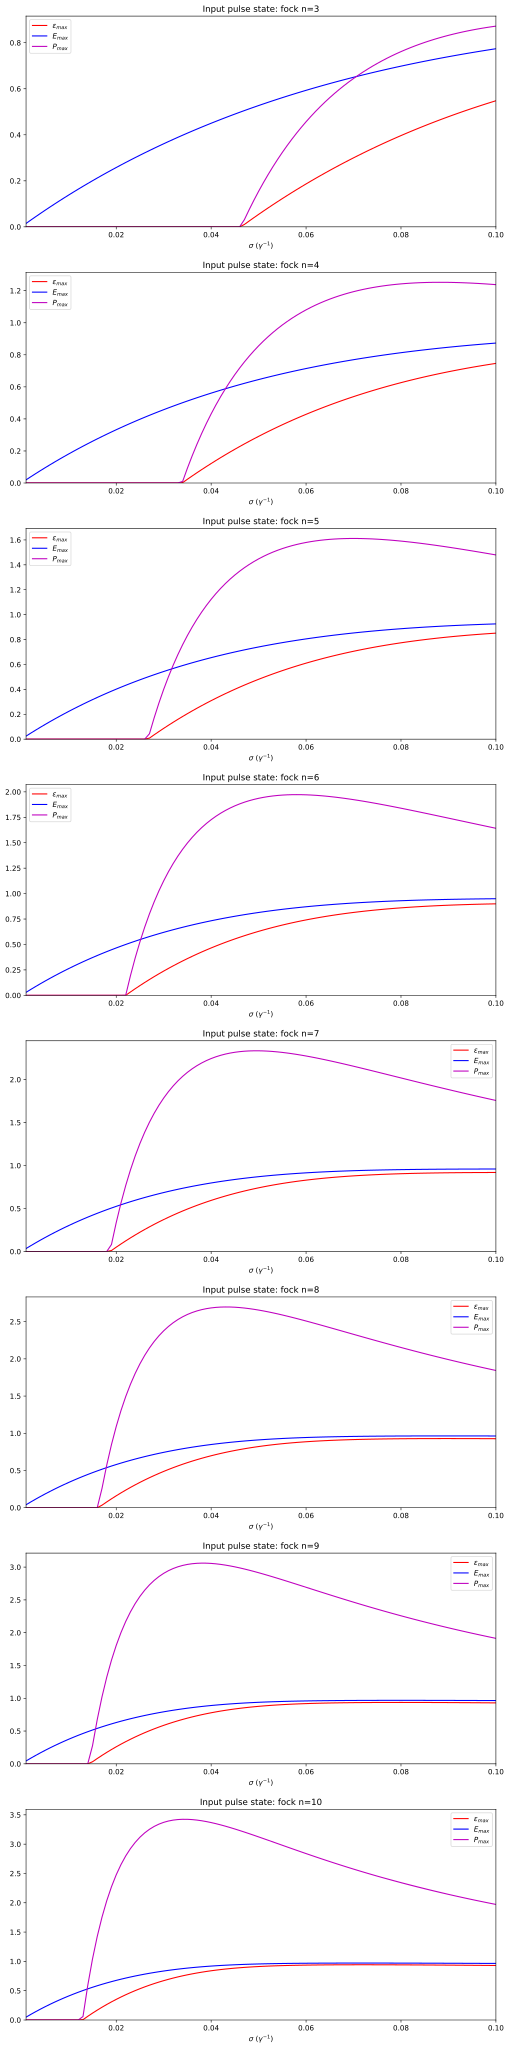

In [25]:
fig, axes = plt.subplots(len(max_erg_fock),figsize=(10, 40))

for i in range( len(max_erg_fock) ):
    plot_max(max_erg_fock[i], max_ene_fock[i], max_pow_fock[i], title='fock n='+str(i+3), ax=axes[i])

plt.tight_layout()
plt.show()

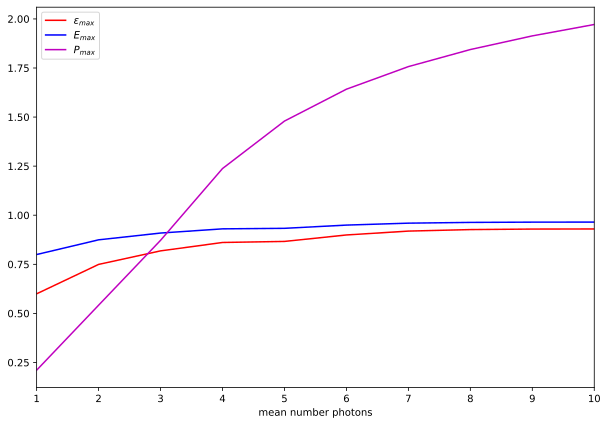

In [27]:
source_dir = "../../outputs/gaussian/max/"

max_erg, max_ene, max_pow = [], [], []
for i in range(1,11,1):
    max_erg.append(max(np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + 
                                                            "/precision_0.001/ergotropy*.dat"))))))
    max_ene.append(max(np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + 
                                                            "/precision_0.001/energy*.dat"))))))
    max_pow.append(max(np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + 
                                                            "/precision_0.001/power*.dat"))))))

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(list(range(1,11)), max_erg, '-r', label='$\epsilon_{max}$')
ax.plot(list(range(1,11)), max_ene, '-b', label='$E_{max}$')
ax.plot(list(range(1,11)), max_pow, '-m', label='$P_{max}$')

ax.set_xlim(1,10)
ax.set_xlabel('mean number photons')

ax.legend()
plt.show()